In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\hemch\Downloads\BI Projects\rossmann.csv")

C:\Users\hemch\AppData\Local\Temp\ipykernel_19296\1126236268.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\hemch\Downloads\BI Projects\rossmann.csv")


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
# Summary statistics
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Checking for missing values
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Exploratory Data Analysis (EDA) Insights**

The dataset has 1,017,209 entries and 9 columns.
There are no missing values in the dataset.
The Date column is currently of type object and needs to be converted to datetime.
The dataset contains daily sales data for various stores, with columns such as Sales, Customers, Open, Promo, StateHoliday, and SchoolHoliday.

In [7]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# Set the Date as the index
data.set_index('Date', inplace=True)

In [9]:
daily_sales = data['Sales'].resample('D').sum()

In [10]:
daily_sales.head()

Date
2013-01-01      97235
2013-01-02    6949829
2013-01-03    6347820
2013-01-04    6638954
2013-01-05    5951593
Freq: D, Name: Sales, dtype: int64

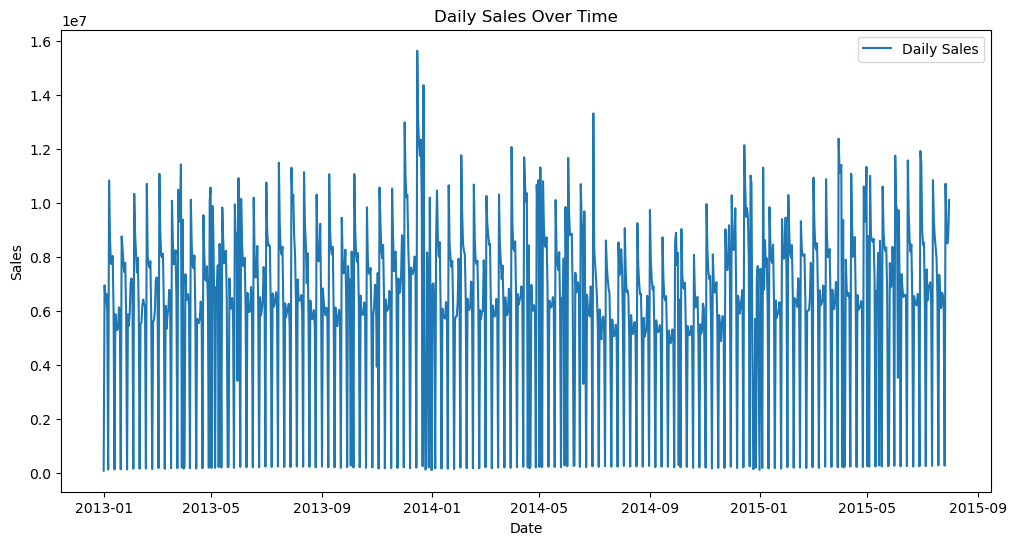

In [11]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Time Series Visualization**


The plot shows the daily sales over time, indicating trends and seasonal patterns.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_sales.dropna())
adf_statistic = result[0]
p_value = result[1]

adf_statistic, p_value

(-4.7616145245956165, 6.436731330559263e-05)

Stationarity Check Results
ADF Statistic: -4.7616
p-value: 6.44 * 10^-5
 
The p-value is much less than 0.05, indicating that we can reject the null hypothesis and conclude that the series is stationary.

Since the series is stationary, we can proceed with building the ARIMA model.

**Building the ARIMA Model**


To determine the best parameters (p, d, q) for the ARIMA model, we'll plot the ACF and PACF of the time series.

C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


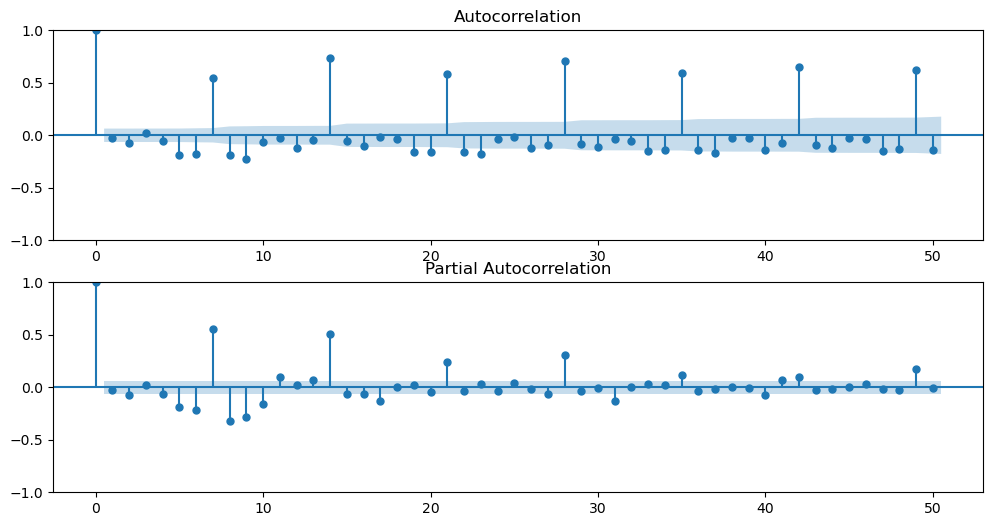

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(daily_sales, lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(daily_sales, lags=50, ax=plt.gca())
plt.show()

ACF and PACF Analysis
The ACF and PACF plots help in determining the parameters 
𝑝
p and 
𝑞
q for the ARIMA model:

ACF (Autocorrelation Function): Helps identify the lag in the MA (Moving Average) part of the model (parameter 
𝑞
q).
PACF (Partial Autocorrelation Function): Helps identify the lag in the AR (AutoRegressive) part of the model (parameter 
𝑝
p).
Determining Parameters
From the plots:

The ACF shows significant autocorrelations up to around lag 1, suggesting 
𝑞
=
1
q=1.
The PACF shows a significant spike at lag 1, suggesting 
𝑝
=
1
p=1.

**Building the ARIMA Model**

Given our data is stationary, 
𝑑
=
0
d=0. So, we'll start with 
𝑝
=
1
p=1, 
𝑑
=
0
d=0, and 
𝑞
=
1
q=1.

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(daily_sales, order=(1, 0, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15419.500
Date:                Wed, 15 May 2024   AIC                          30847.001
Time:                        12:31:43   BIC                          30866.393
Sample:                    01-01-2013   HQIC                         30854.392
                         - 07-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.235e+06   7.45e+04     83.724      0.000    6.09e+06    6.38e+06
ar.L1          0.7455      0.111      6.689      0.000       0.527       0.964
ma.L1         -0.8207      0.093     -8.783      0.000      -1.004      -0.638
sigma2      9.784e+12      0.006    1.7e+15      0.000    9.78e+12    9.78e+12
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                65.16
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.64
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.18e+29. Standard errors may be unstable.
"""

**Model Summary**


The ARIMA(1, 0, 1) model has been fitted. Here are some key points from the summary:

AR(1) coefficient (p=1): 0.7455 (significant, p-value < 0.05)
MA(1) coefficient (q=1): -0.8207 (significant, p-value < 0.05)
Constant (intercept): 6.235e+06
Sigma2 (variance of the residuals): 9.784e+12
Model Evaluation
Next, we evaluate the model by examining the residuals.

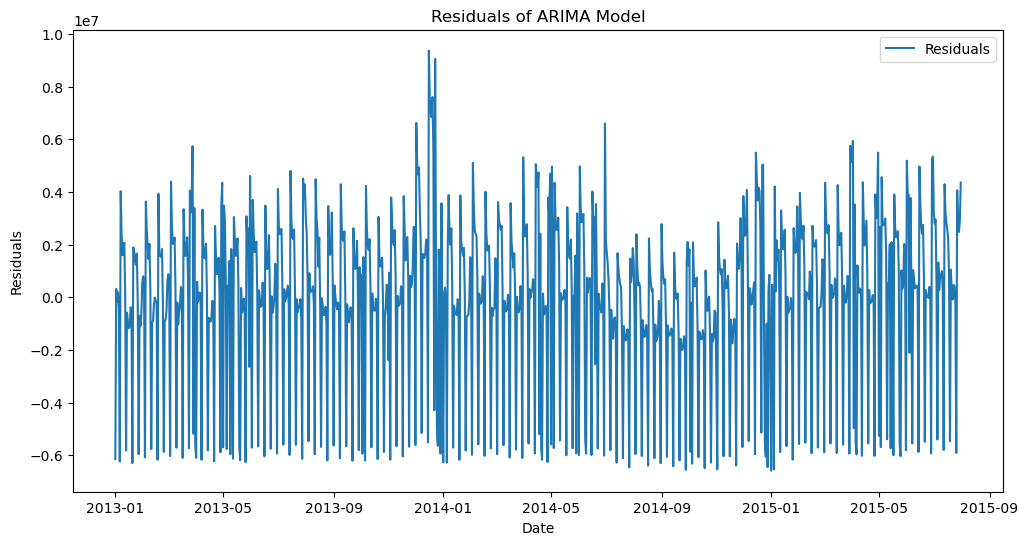

C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


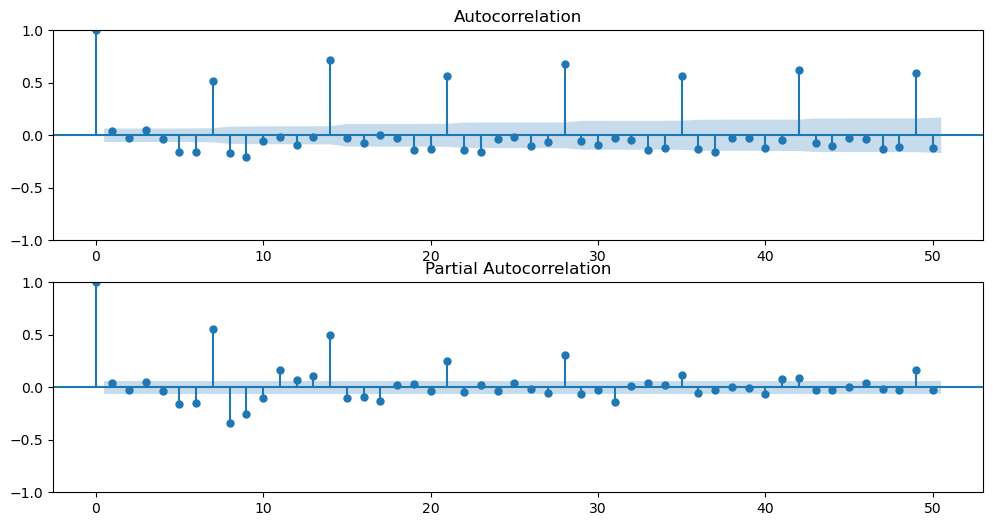

In [16]:
# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(model_fit.resid, lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(model_fit.resid, lags=50, ax=plt.gca())
plt.show()

**Residual Analysis**

Residual Plot: The residuals appear to be centered around zero, indicating a good fit.
ACF and PACF of Residuals: The autocorrelations are mostly within the confidence interval, suggesting the residuals are white noise (i.e., no significant autocorrelation remaining).

**Forecasting**

Now, let's use the ARIMA model to forecast future sales

C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hemch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hemch\anaconda3\lib\site-packages\stat

Mean Absolute Error: 99589992.71643396


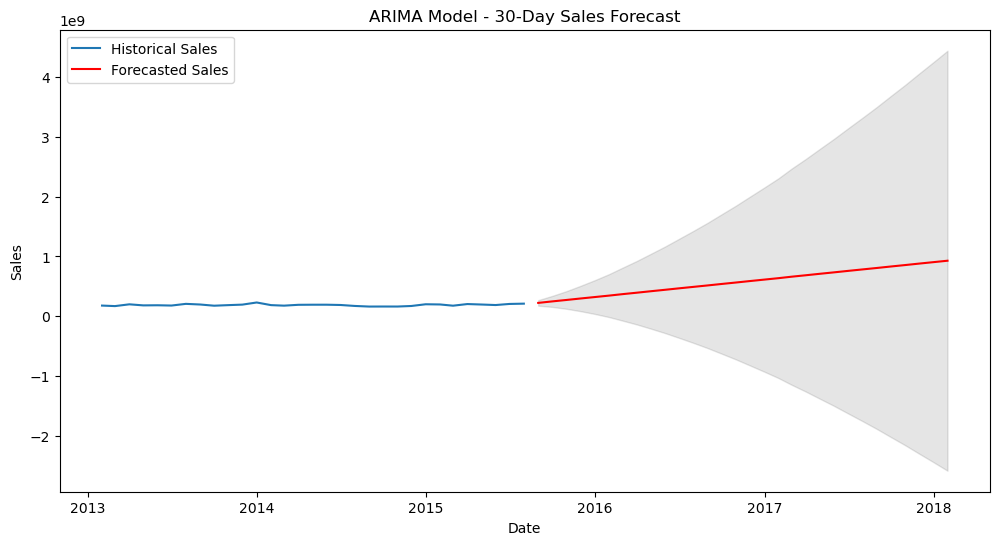

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import itertools

# Resample the data to monthly frequency and sum the sales
monthly_sales = data['Sales'].resample('M').sum()

# Split the data into training and test sets (80% training, 20% test)
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Find the best ARIMA model parameters using AIC
best_aic = float('inf')
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

# Fit the ARIMA model with the best parameters
model = ARIMA(train, order=best_pdq)
results = model.fit()

# Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, typ='levels')

# Evaluate the model's performance
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error: {mae}')

# Forecast the next 30 days using the get_forecast method
forecast_steps = 30
forecast_object = results.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Ensure the forecast index aligns with the monthly data index
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.to_numpy(), index=forecast_index)

# Separate confidence interval into lower and upper bounds
conf_int_lower = conf_int.iloc[:, 0].to_numpy()
conf_int_upper = conf_int.iloc[:, 1].to_numpy()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', color='red')
plt.fill_between(forecast_series.index, conf_int_lower, conf_int_upper, color='k', alpha=0.1)  # Confidence interval
plt.legend(loc='upper left')
plt.title('ARIMA Model - 30-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()